In [1]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.title_fontsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, confusion_matrix, auc


Define functions to plot ROC curves and confusion matrix.

In [8]:
def one_hot_encoding(y, num_class=6):
    return np.eye(num_class)[y]

def plot_roc(y, pred, colors, labels):

    num_classes = pred.shape[1]
    
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(one_hot_encoding(y)[:, i], pred[:, i])
        plt.plot(fpr, tpr, color=colors[i], label='%s (AUC = %0.3f)' % (labels[i], auc(fpr, tpr)), lw=1.5, alpha=.8)  

    plt.plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='k', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.grid(ls='--', alpha=0.5)
    plt.legend(loc='best')
    plt.title('Receiver Operating Characteristic Curve')

def viz_conf_matrix(cm, labels):
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            p = cm_perc[i, j]
            if p < 1:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%' % p
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    
    ax = sns.heatmap(cm, annot=annot, fmt='', cmap="Blues")
    
    ax.set_ylabel('Actual', labelpad=-30) 
    ax.set_xlabel('Predicted', labelpad=-20)
    
    plt.title('Confusion Matrix')

Cross-validation

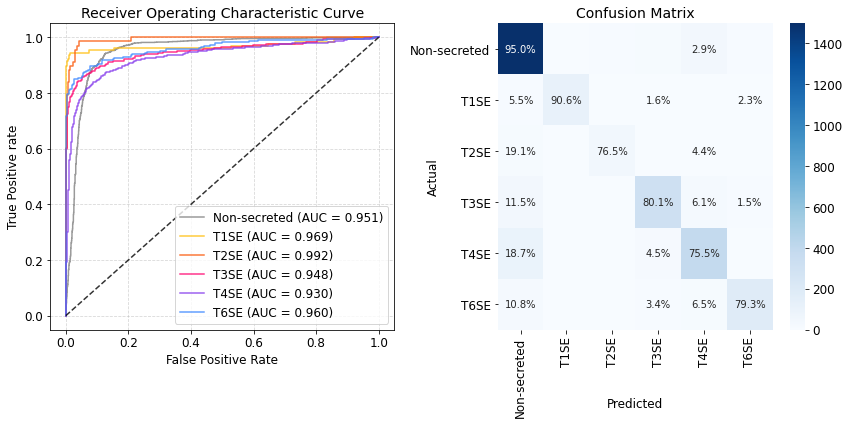

In [9]:
colors = ['#808080', '#ffbe0b', '#fb5607', '#ff006e', '#8338ec', '#3a86ff']
plot_labels = ['Non-secreted', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE']

all_truth = []
all_probs = []
all_preds = []
    
for idx in range(5):
    y = np.load(f'MoCETSE/y_valid_{idx+1}.npy')
    pred = np.load(f'MoCETSE/pred_valid_{idx+1}.npy')
    prob = np.load(f'MoCETSE/prob_valid_{idx+1}.npy')
    
    all_truth.append(y)
    all_preds.append(pred)
    all_probs.append(prob)
    
all_truth = np.concatenate(all_truth, axis=0)
all_preds = np.concatenate(all_preds, axis=0)
all_probs = np.concatenate(all_probs, axis=0)
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_roc(all_truth, all_probs, colors, plot_labels)
plt.subplot(1, 2, 2)
cm = confusion_matrix(all_truth, all_preds)
viz_conf_matrix(cm, plot_labels)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

plt.savefig('png/valid_roc.png', dpi=600, bbox_inches='tight')
plt.show()

Independent test

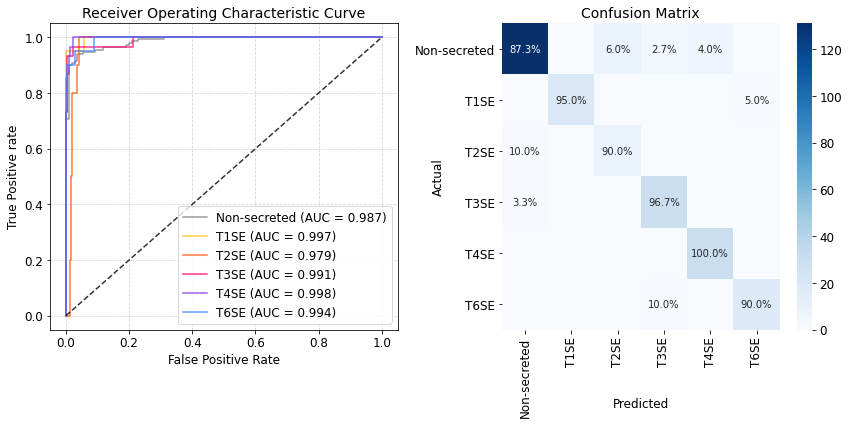

In [10]:
y = np.load(f'MoCETSE/y_test_2.npy')
pred = np.load(f'MoCETSE/pred_test_2.npy')
prob = np.load(f'MoCETSE/prob_test_2.npy')
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_roc(y, prob, colors, plot_labels)
plt.subplot(1, 2, 2)
cm = confusion_matrix(y, pred)
viz_conf_matrix(cm, plot_labels)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

plt.savefig('png/test_roc.png', dpi=600, bbox_inches='tight')
plt.show()